In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Radar, FontManager, PyPizza
from scipy import stats
from numpy import mean
import math
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
# fqpl_data = pd.read_csv('League One per 90s.csv', delimiter = ';')
epl_fullbacks = pd.read_csv('EPL full-backs general stats.csv', delimiter = ';')

# fqpl_players_data = fqpl_data.drop(['Minutes played', 'Position'], axis = 1)
epl_players_data = epl_fullbacks.drop(['Minutes played', 'Position'], axis = 1)

In [3]:
# for i in range(len(fqpl_players_data['Accurate passes, %'])):
#     fqpl_players_data['Accurate passes, %'][i] = fqpl_players_data['Accurate passes, %'][i].replace('%', '')
#     fqpl_players_data['Accurate passes, %'][i] = int(fqpl_players_data['Accurate passes, %'][i])
    
#     fqpl_players_data['Tackles won, %'][i] = fqpl_players_data['Tackles won, %'][i].replace('%', '')
#     fqpl_players_data['Tackles won, %'][i] = int(fqpl_players_data['Tackles won, %'][i])
    
#     fqpl_players_data['Successful dribbles, %'][i] = fqpl_players_data['Successful dribbles, %'][i].replace('%', '')
#     fqpl_players_data['Successful dribbles, %'][i] = int(fqpl_players_data['Successful dribbles, %'][i])

In [4]:
# stat = fqpl_players_data.drop(['Player'], axis = 1)
stat = epl_players_data.drop(['Player'], axis = 1)

params = list(stat.columns)

In [5]:
params

['Assists per 90',
 'xA per 90',
 'Deep completions per 90',
 'Key passes per 90',
 'Crosses per 90',
 'Accurate crosses, %',
 'Deep completed crosses per 90',
 'Passes per 90',
 'Accurate passes, %',
 'Accurate progressive passes, %',
 'Accurate passes to final third, %',
 'Accurate passes to penalty area, %',
 'Dribbles per 90',
 'Successful dribbles, %',
 'Progressive runs per 90',
 'Offensive duels won, %',
 'Defensive duels won, %',
 'PAdj Sliding tackles',
 'PAdj Interceptions']

In [6]:
def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
   
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

In [9]:
player_name = 'L. Digne'
player_team = 'Everton'

In [10]:
fqpl_league_data = epl_fullbacks.loc[(epl_fullbacks['Position'] == 'RB') & (epl_fullbacks['Minutes played'] >= 750) | (epl_fullbacks['Position'] == 'LB') & (epl_fullbacks['Minutes played'] >= 750)]
fqpl_league_data = fqpl_league_data.drop(['Position', 'Minutes played'], axis = 1).reset_index()

# for i in range(len(fqpl_league_data['Accurate passes, %'])):
#     fqpl_league_data['Accurate passes, %'][i] = fqpl_league_data['Accurate passes, %'][i].replace('%', '')
#     fqpl_league_data['Accurate passes, %'][i] = int(fqpl_league_data['Accurate passes, %'][i])
    
#     fqpl_league_data['Tackles won, %'][i] = fqpl_league_data['Tackles won, %'][i].replace('%', '')
#     fqpl_league_data['Tackles won, %'][i] = int(fqpl_league_data['Tackles won, %'][i])
    
#     fqpl_league_data['Successful dribbles, %'][i] = fqpl_league_data['Successful dribbles, %'][i].replace('%', '')
#     fqpl_league_data['Successful dribbles, %'][i] = int(fqpl_league_data['Successful dribbles, %'][i])

fqpl_league_data

,index,Player,Assists per 90,xA per 90,Deep completions per 90,Key passes per 90,Crosses per 90,"Accurate crosses, %",Deep completed crosses per 90,Passes per 90,...,"Accurate progressive passes, %","Accurate passes to final third, %","Accurate passes to penalty area, %",Dribbles per 90,"Successful dribbles, %",Progressive runs per 90,"Offensive duels won, %","Defensive duels won, %",PAdj Sliding tackles,PAdj Interceptions
0,0,T. Alexander-Arnold,0.42,0.39,1.82,1.04,4.59,42.05,1.77,63.68,...,87.21,67.09,50.43,1.51,48.28,1.25,42.55,59.26,0.26,7.61
1,1,A. Robertson,0.27,0.18,1.51,0.76,4.87,33.80,1.44,62.40,...,85.88,78.00,50.00,1.51,54.55,2.75,43.90,54.55,0.12,7.18
2,2,João Cancelo,0.19,0.08,2.06,0.52,3.89,34.94,1.26,78.38,...,83.27,81.18,53.72,4.03,61.63,2.48,52.38,65.69,0.26,7.01
3,3,L. Shaw,0.07,0.20,0.36,0.28,2.63,16.22,0.36,47.95,...,79.61,71.59,29.73,1.42,60.00,3.20,50.98,53.68,0.58,4.84
4,4,A. Wan-Bissaka,0.00,0.04,0.31,0.25,1.92,35.48,0.56,44.50,...,63.64,76.19,41.94,3.03,65.31,2.54,55.67,61.00,1.25,6.65
5,5,K. Tierney,0.21,0.08,0.56,0.35,4.08,39.66,1.27,36.24,...,72.12,66.10,42.55,2.60,62.16,2.11,59.65,58.62,0.09,4.77
6,6,L. Digne,0.00,0.16,0.43,0.36,3.43,33.33,1.21,36.26,...,72.73,71.43,50.00,2.21,67.74,1.00,53.85,66.04,0.76,7.33
7,7,T. Castagne,0.00,0.04,0.45,0.19,1.23,47.37,0.52,38.25,...,66.34,60.71,52.38,1.17,66.67,0.91,39.13,68.00,0.25,6.43
8,8,Sergio Reguilón,0.20,0.11,0.66,0.66,3.88,33.90,1.31,36.20,...,62.04,73.33,42.11,2.76,42.86,1.58,37.35,60.68,0.52,5.67
9,9,K. Walker,0.08,0.05,0.73,0.32,1.45,38.89,0.48,73.23,...,80.26,84.21,45.83,0.89,54.55,2.42,40.54,64.52,0.27,4.71


In [11]:
low = []
high = []
values = []

stat = fqpl_league_data.drop(['Player'], axis = 1).reset_index()

for x in params:

    a = min(stat[params][x])
    res = isinstance(a, str)

    if res == True:
        a = a.rstrip("%")
        a = int(a)
        low.append(a)
    else:
        low.append(a)

    b = max(stat[params][x])
    res = isinstance(b, str)

    if res == True:
        b = b.rstrip("%")
        b = int(b)
        high.append(b)
    else:
        high.append(b)
    
for x in range(len(epl_players_data['Player'])):
    if epl_players_data['Player'][x] == player_name:
        values = epl_players_data.iloc[x].values.tolist()
        
values = values[1:]

In [12]:
values

[0.0,
 0.16,
 0.43,
 0.36,
 3.43,
 33.33,
 1.21,
 36.26,
 77.36,
 72.73,
 71.43,
 50.0,
 2.21,
 67.74,
 1.0,
 53.85,
 66.04,
 0.76,
 7.33]

In [13]:
player_percentage = []

for x in range(len(params)):
    player_percentage.append(math.floor(stats.percentileofscore(fqpl_league_data[params[x]], values[x])))

player_percentage

[20, 91, 35, 66, 75, 47, 81, 48, 37, 54, 70, 70, 59, 89, 29, 83, 78, 79, 75]

In [14]:
average = []

for x in params:
    c = mean(fqpl_league_data[params][x])
    average.append(c)

In [21]:
params[0] = 'Assists'
params[1] = 'Expected assists'
params[2] = 'Deep completions'
params[3] = 'Key passes'
params[4] = 'Crosses'
params[5] = 'Accurate crosses\n(%)'
params[6] = 'Deep completed\ncrosses'
params[7] = 'Passes'
params[8] = 'Accurate passes\n(%)'
params[9] = 'Accurate\nprogressive passes\n(%)'
params[10] = 'Accurate passes\nto final 3rd\n(%)'
params[11] = 'Accurate passes\nto penalty box\n(%)'
params[12] = 'Attempted dribbles'
params[13] = 'Successful dribbles\n(%)'
params[14] = 'Progressive runs'
params[15] = 'Off duels won\n(%)'
params[16] = 'Def duels won\n(%)'
params[17] = 'PAdj\nSliding tackles'
params[18] = 'PAdj\nInterceptions'

In [16]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))
URL1 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL1)

Text(0.93, 0.02, 'Dữ liệu bởi Wyscout\nThực hiện bởi Thái Đào')

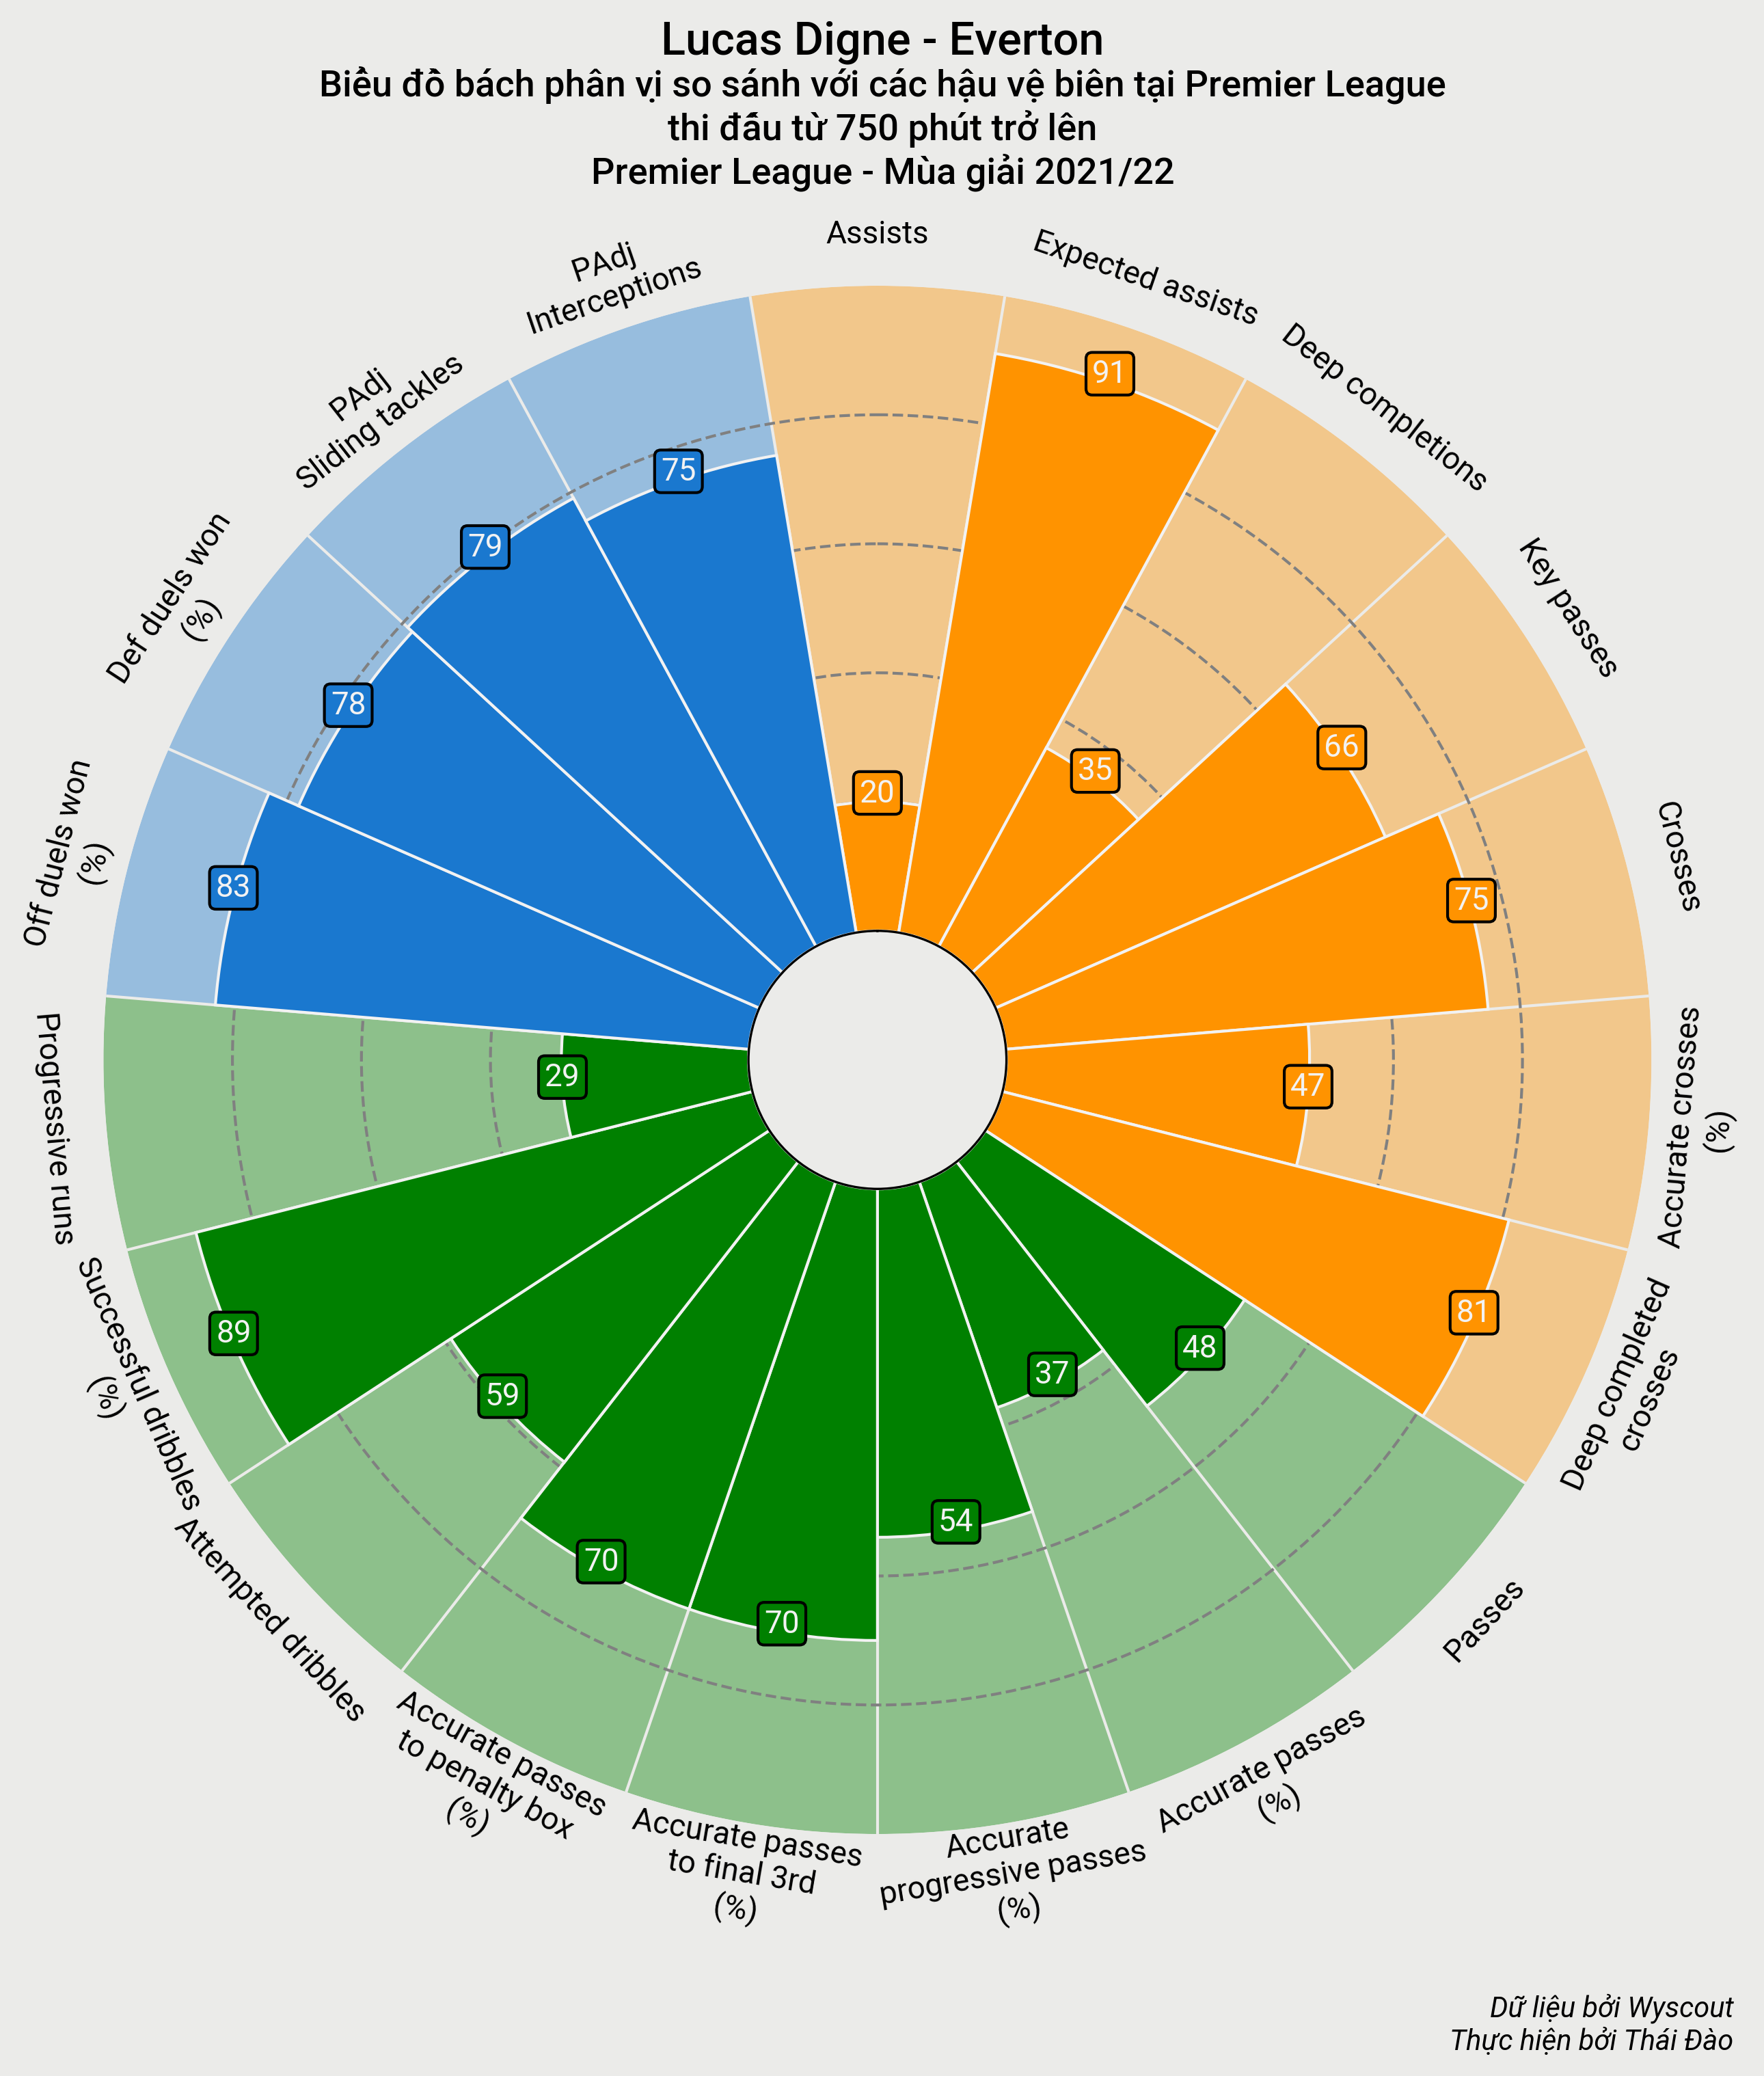

In [22]:
slice_colors = ["#ff9300"] * 7 + ["green"] * 8 + ["#1a78cf"] * 4
text_colors = ["#f2f2f2"] * 19

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_ls="--",           # linestyle for other circles
    other_circle_lw=1,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    player_percentage,               # list of values
    figsize=(10, 10),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.993, f"Lucas Digne - {player_team}", size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.93,
    "Biểu đồ bách phân vị so sánh với các hậu vệ biên tại Premier League\nthi đấu từ 750 phút trở lên\nPremier League - Mùa giải 2021/22",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "Dữ liệu bởi Wyscout"
CREDIT_2 = "Thực hiện bởi Thái Đào"

fig.text(
    0.93, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=10,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

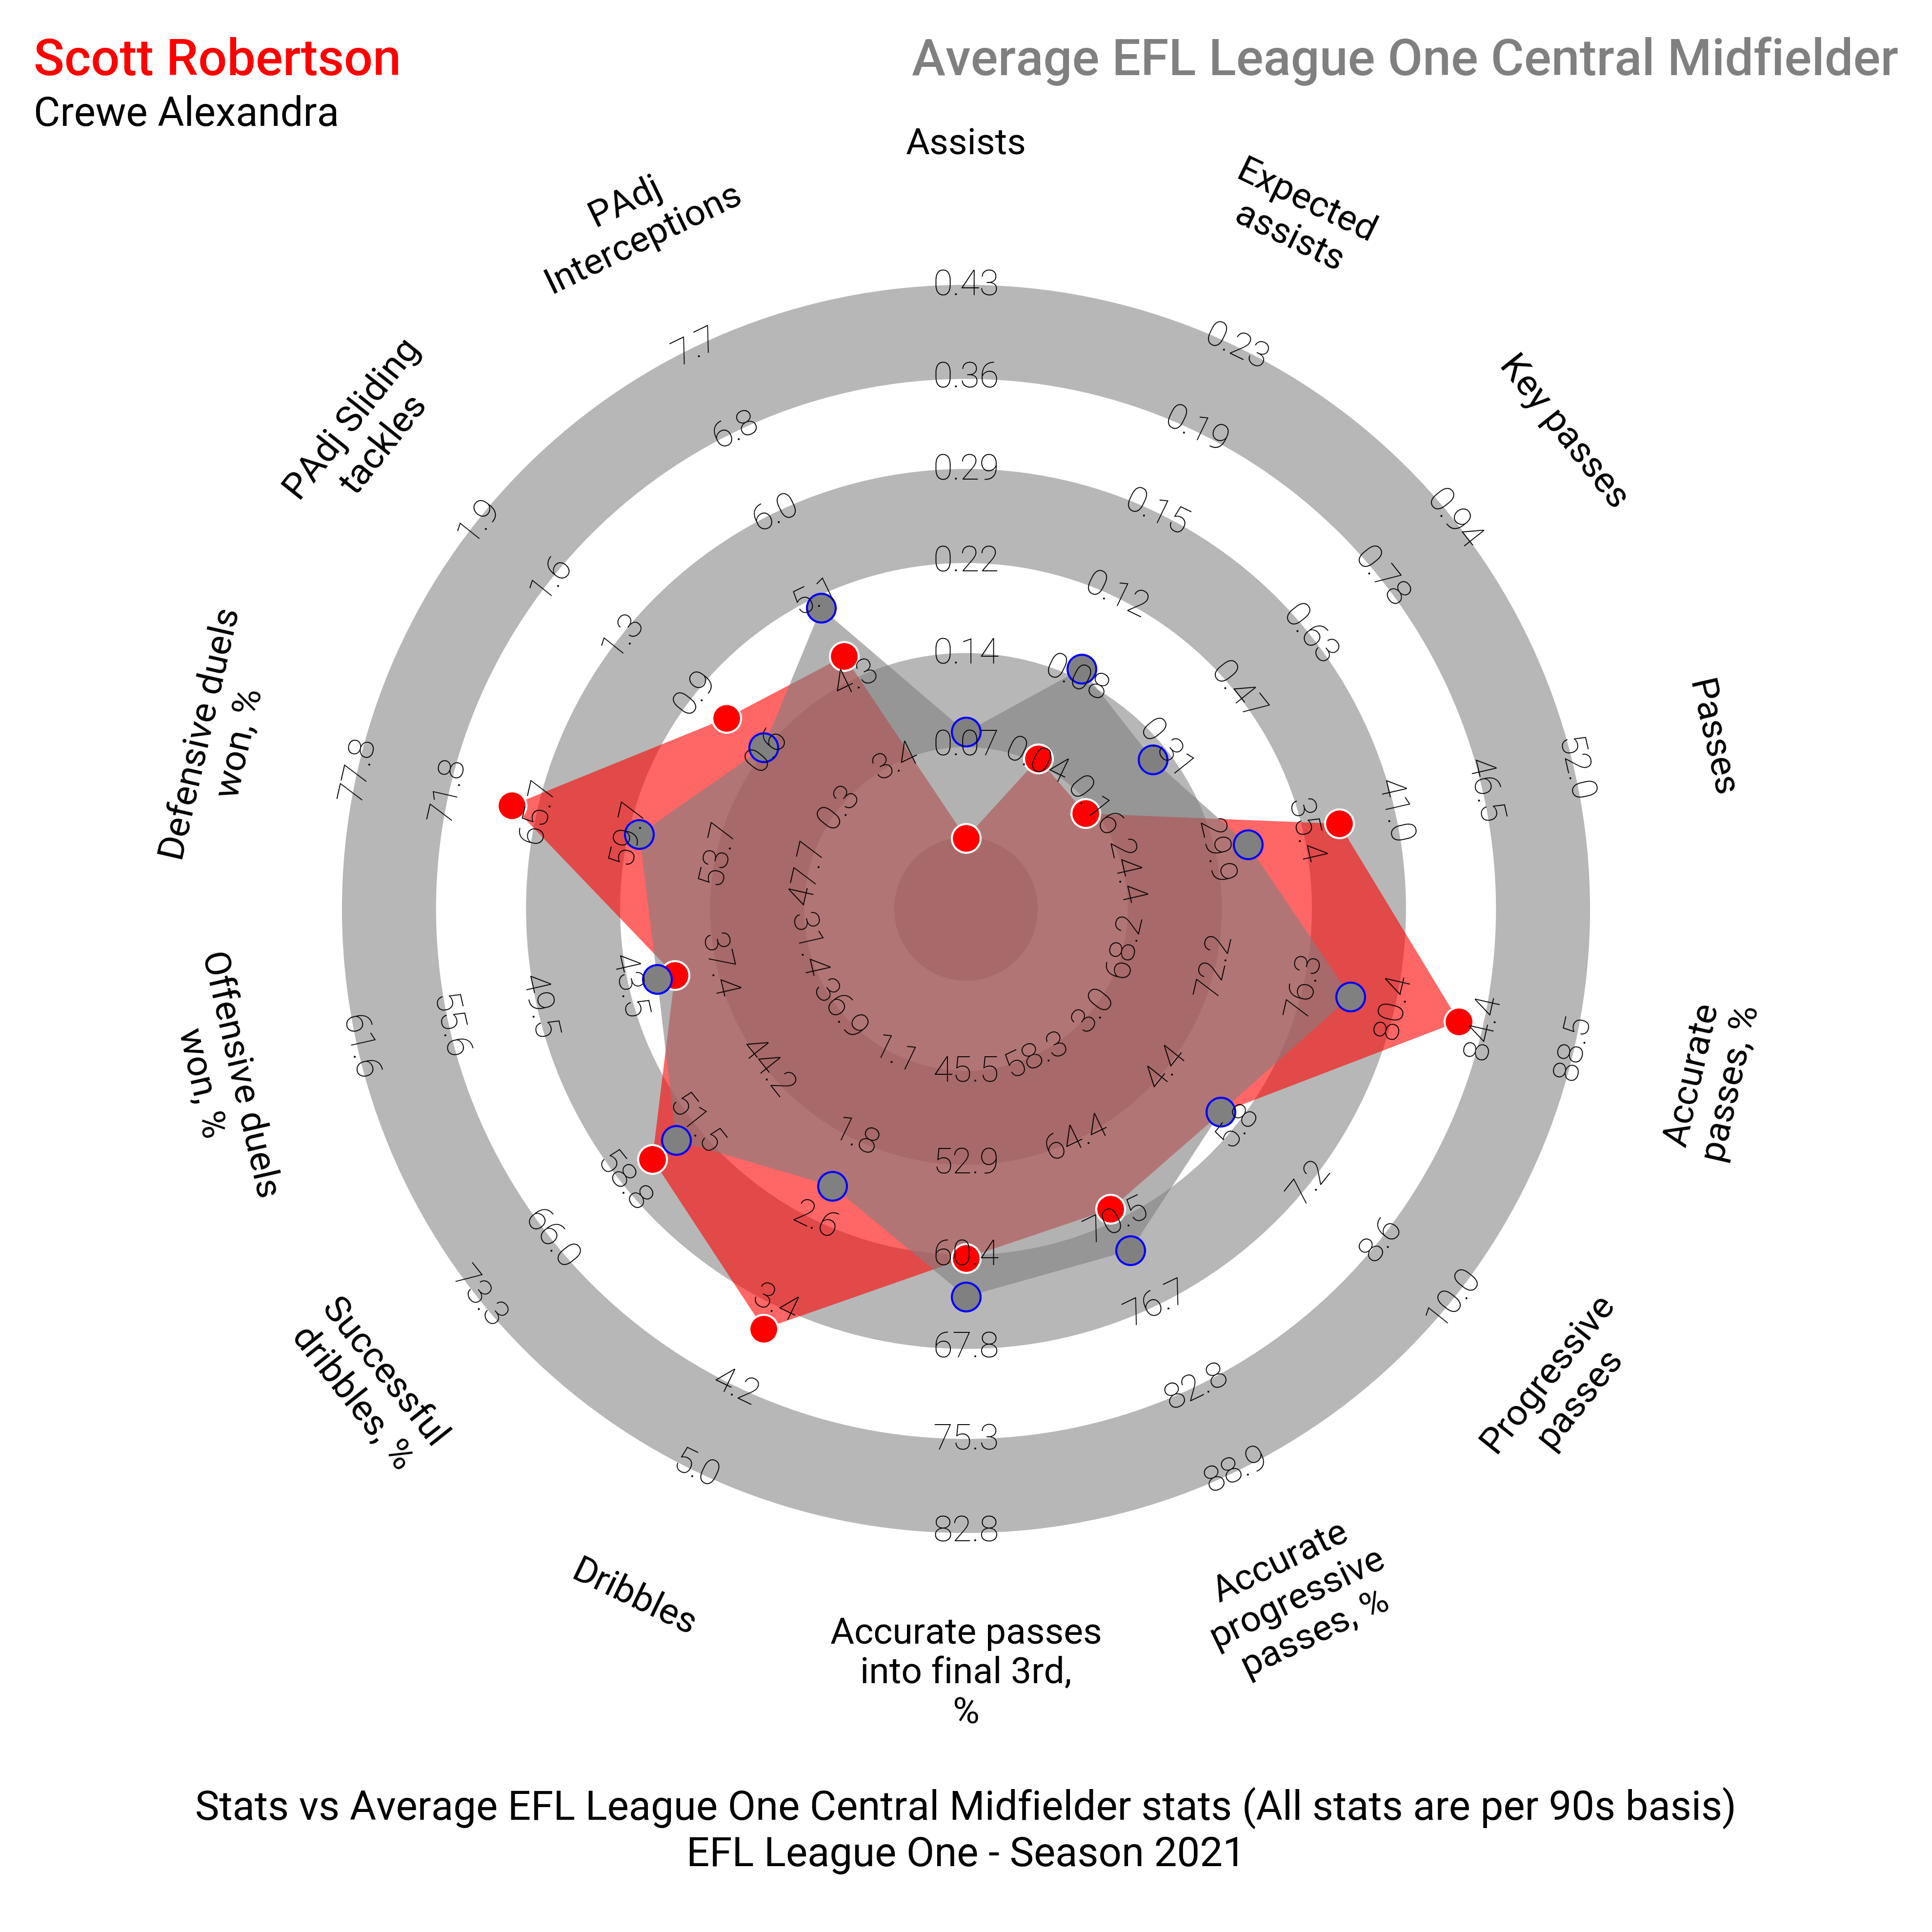

In [ ]:
# Draw the radar with the created arrays of data
radar = Radar(params, low, high,
                      # Round values to integer or keep them as float values
                      round_int = [False] * 14,
                      num_rings = 6,  # The number of concentric circles (excluding center circle)
                      ring_width = 0.65, center_circle_radius = 0.5)

# Call radar_mosaic function to setup the radar
fig, axs = radar_mosaic(radar_height = 0.8, title_height = 0.07, figheight = 13)

radar.setup_axis(ax = axs['radar']) # Setup an axis to draw the radar
rings_inner = radar.draw_circles(ax = axs['radar'], facecolor = '#b7b7b7', edgecolor = '#b7b7b7') # Draw inner circles
# Call the draw_radar_compare from mplsoccer package
radar_output = radar.draw_radar_compare(values, average, ax = axs['radar'],
                                        kwargs_radar={'facecolor': 'red', 'alpha': 0.6}, # Set the facecolor and the transparency of the first radar
                                        kwargs_compare={'facecolor': 'grey', 'alpha': 0.6}) # Set the facecolor and the transparency of the second radar
radar_poly, rings_outer, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax = axs['radar'], fontsize = 17.5, 
                                        fontproperties = robotto_thin.prop) # Set the necessary properties for the radar's ranges
param_labels = radar.draw_param_labels(ax = axs['radar'], fontsize = 18, 
                                        fontproperties = font_normal.prop) # Set the necessary properties for the radar's parameters
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c = 'red', edgecolors = 'white', marker = 'o', s = 200, zorder = 2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c = 'grey', edgecolors = 'blue', marker = 'o', s = 200, zorder = 2)


title1_text = axs['title'].text(0.01, 0.65, "Scott Robertson", fontsize = 25, fontproperties = font_bold.prop, 
                                ha = 'left', va = 'center', color = "red") # Set the properties for the first player
title2_text = axs['title'].text(0.01, 0.25, player_team, fontsize = 20, fontproperties = font_normal.prop,
                                ha = 'left', va = 'center')
title3_text = axs['title'].text(0.99, 0.65, 'Average EFL League One Central Midfielder', fontsize = 25, fontproperties = font_bold.prop,
                                ha='right', va='center', color = "grey") # Set the properties for the second player
endnote1_text = axs['endnote'].text(0.5, 0.35, 'Stats vs Average EFL League One Central Midfielder stats (All stats are per 90s basis)\nEFL League One - Season 2021', fontsize = 20,
                                          fontproperties = font_normal.prop, ha = 'center', va = 'center')

fig.set_facecolor("#ffffff") # Set the background colour of the figure
fig.set_figwidth(13) # Set the width of the figure
fig.set_figheight(13) # Set the height of the figure